### 2D visualization of coil-20 images   

#### Import libraries  

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

#### Parameters  

In [26]:
csv_in = 'coil-20-16x16.csv'
n_components = 2
n_neighbors = 10
n_obj = 20

#### Read CSV file  

In [27]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1440, 257)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Columns: 257 entries, 0 to obj
dtypes: int64(257)
memory usage: 2.8 MB
None


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,obj
0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0


#### Separate data  

In [28]:
df_X = df.iloc[:,:-1]
obj = df['obj']
display(df_X.head())
print(obj.head())

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


0    0
1    0
2    0
3    0
4    0
Name: obj, dtype: int64


In [35]:
df_X

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Standardization  

In [29]:
sc = StandardScaler()
X = sc.fit_transform(df_X) 

#### Manifold learning  

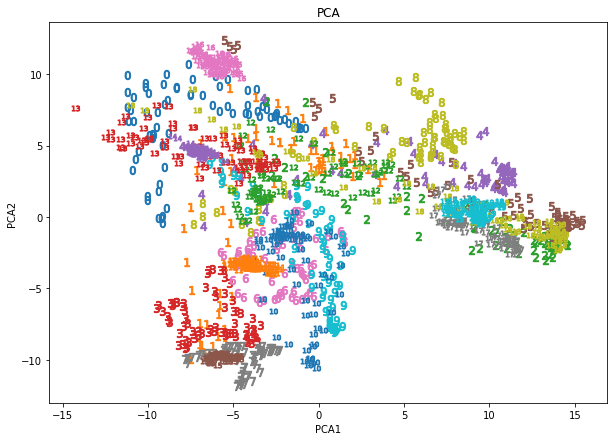

In [30]:
# PCA
Y = PCA(n_components=n_components).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("PCA")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

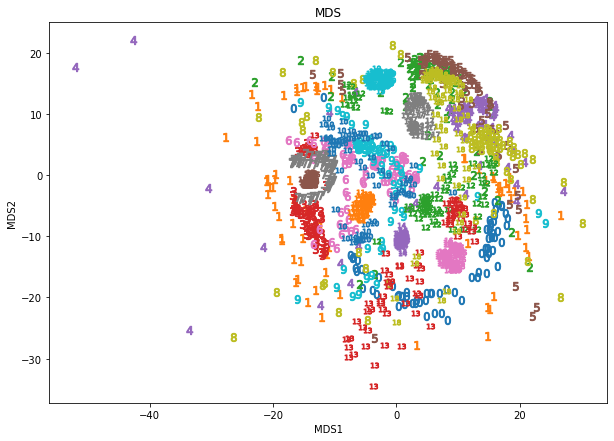

In [31]:
# MDS
Y = MDS(n_components=n_components, random_state=0).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("MDS")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()

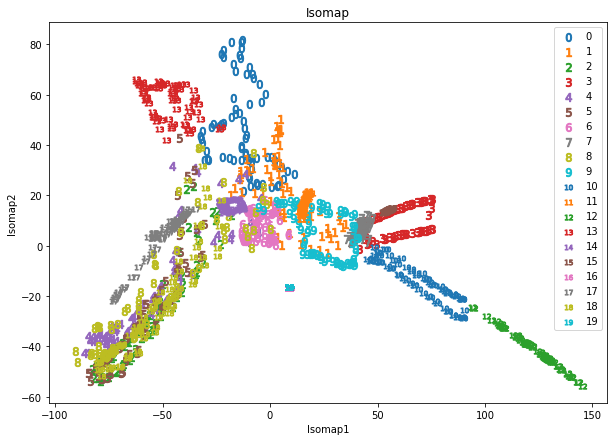

In [32]:
# Isomap
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("Isomap")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.legend()
plt.show()

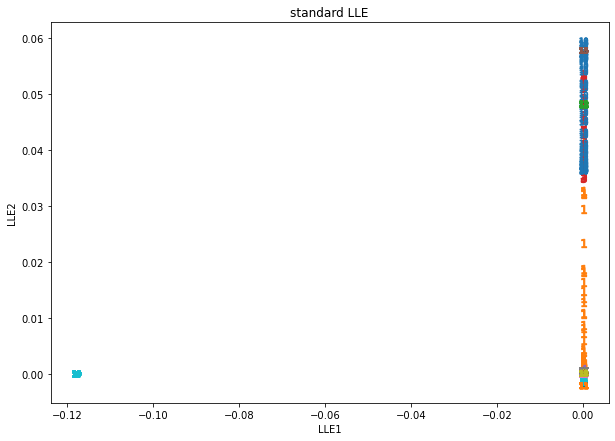

In [33]:
# LLE
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard').fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("standard LLE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('LLE1')
plt.ylabel('LLE2')
plt.show()

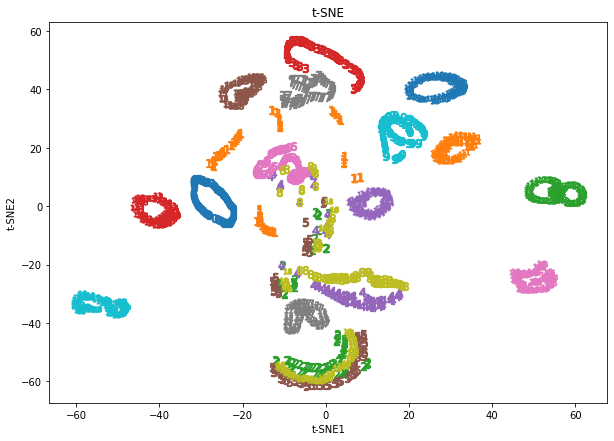

In [34]:
# t-SNE
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=0).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("t-SNE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()